In [ ]:
#- Comes under unsupervised learning algorithm 
#- Models are trained using only input vector
#- In supervised learning we have both the input and output vector to train the model
#- Objective of the clustering operation is to form clusters which possess too much similarty within the same cluster
# and too much dissimilarty between any two different structures
# - applicable only on numerical variable, proper treatment of categorical variable is required
#- Every cluster has its centroid, and different centroids are as far as possible
#- Step 1 - Pick K random points as cluster centers called centroids.
#- Step 2 - Assign each point to nearest cluster by calculating its distance to each centroid.
#- Step 3 - Find new cluster center by taking the average of the assigned points.
#- Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

In [17]:
# importing necessary libraries
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
# allow plots to appear directly in the notebook
%matplotlib inline

In [6]:
# getting current working directory
import os
os.getcwd()

'C:\\Users\\fpalash\\Desktop\\R_and_Kaggle\\Python\\PRACTICE\\ML\\k_Means'

In [25]:
df = pd.read_csv('xclara.csv')
df.shape

(3000, 2)

In [26]:
df.head(5)

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [27]:
list(df)

['V1', 'V2']

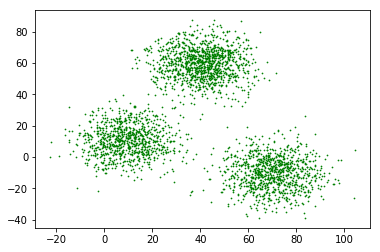

In [55]:
f1 = df['V1'].values
f2 = df['V2'].values
X = np.array(list(zip(f1, f2))) #convert two numpy 1-D array to a 2-d Numpy array [[x1,y1],[x2,y2]...[xn,yn]]
plt.scatter(f1,f2,c='green',s = 0.5)
# as seen we already have very well defined 2 cluster let's see how algorithm assigns the 

In [54]:
# let's define a function to calculate euclidean distance
def dist(a,b, ax=1): # axis defined = 1 because operation will be column wise
    return np.linalg.norm(a - b, axis = ax) #linalg = linear algebra performed on two points a and b (will calculate distance)


In [60]:
#as can be seen well defined cluster = 3
k = 3
# X coordinates of random centroids              # np.max(X) gives us the maximum element row wise in a 2d array
C_x = np.random.randint(0, np.max(X)-20, size=k) # will create 3 random centroid(x-coordinates only) between 0 and above defined number
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32) #using listg zip we are merging tow 1-D array to form one 2-D array [[1,2],[3,4]]..
print(C)

#following gives us three random centroid value this value changes every time we run the code

[[38. 25.]
 [64. 29.]
 [68. 45.]]


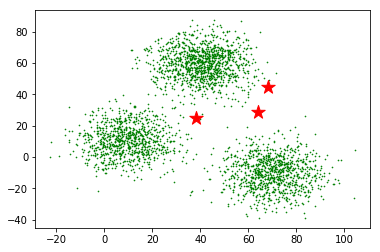

In [66]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='g', s=0.4)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')
# star indicates centroid we got in this interation 

In [68]:

from copy import deepcopy

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

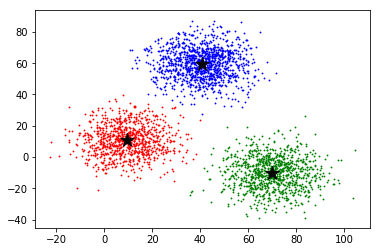

In [71]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=0.7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

#we got the result exactly as expected but this is because we already knew the number of cluster

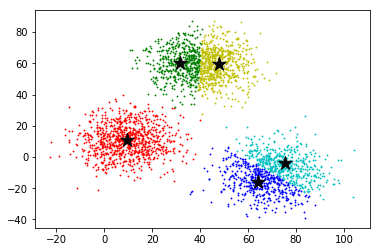

In [81]:
# let's vary the number of clusters and re-run the whole thing
#trying with 5 clusters

k = 5
# X coordinates of random centroids              # np.max(X) gives us the maximum element row wise in a 2d array
C_x = np.random.randint(0, np.max(X)-20, size=k) # will create 3 random centroid(x-coordinates only) between 0 and above defined number
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32) #using listg zip we are merging tow 1-D array to form one 2-D array [[1,2],[3,4]]..

from copy import deepcopy

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=0.7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [ ]:
# if we observe the above figure carefully we will notice wrong information is being learned by model because of our mistake
# we need to tune the model so that similar clusters can be further merged so that we finally get only 3 clusters

In [95]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [96]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[  9.455778   10.662097 ]
 [ 31.677114   60.136524 ]
 [ 64.26006   -16.275572 ]
 [ 48.02195    59.328873 ]
 [ 75.493904   -4.0663085]]
[[ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]
 [ 69.92418447 -10.11964119]]


In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

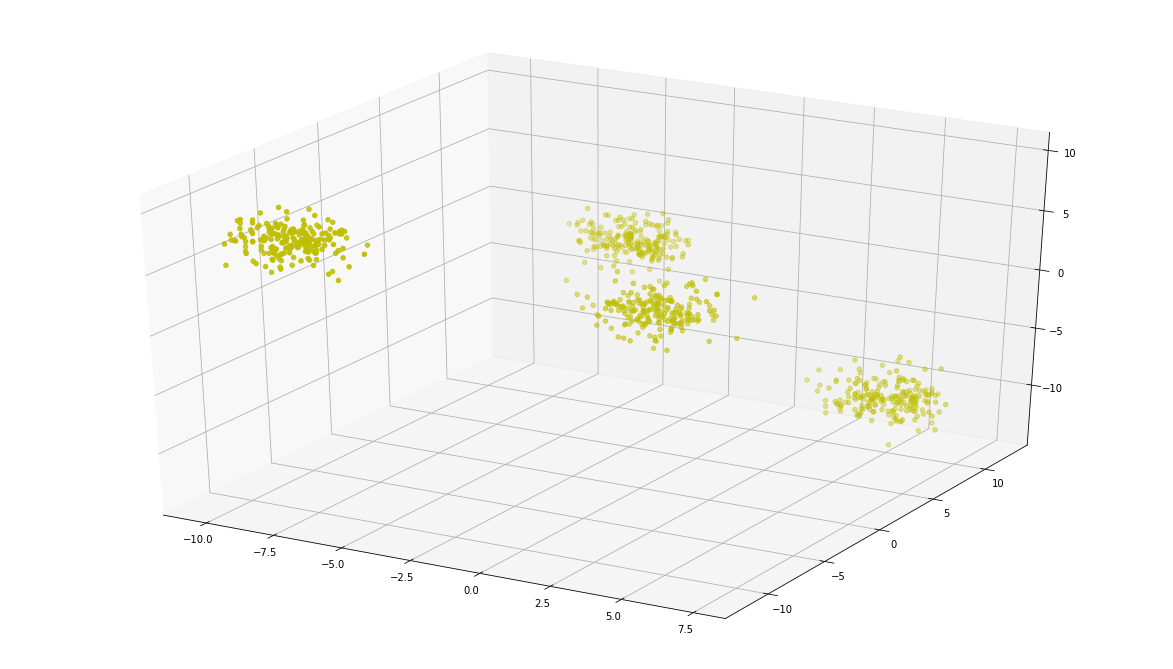

In [100]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='y')
# 4 clusters with 3 dimensions each..actual data will have n dimension and visualization won't be possible then

In [101]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

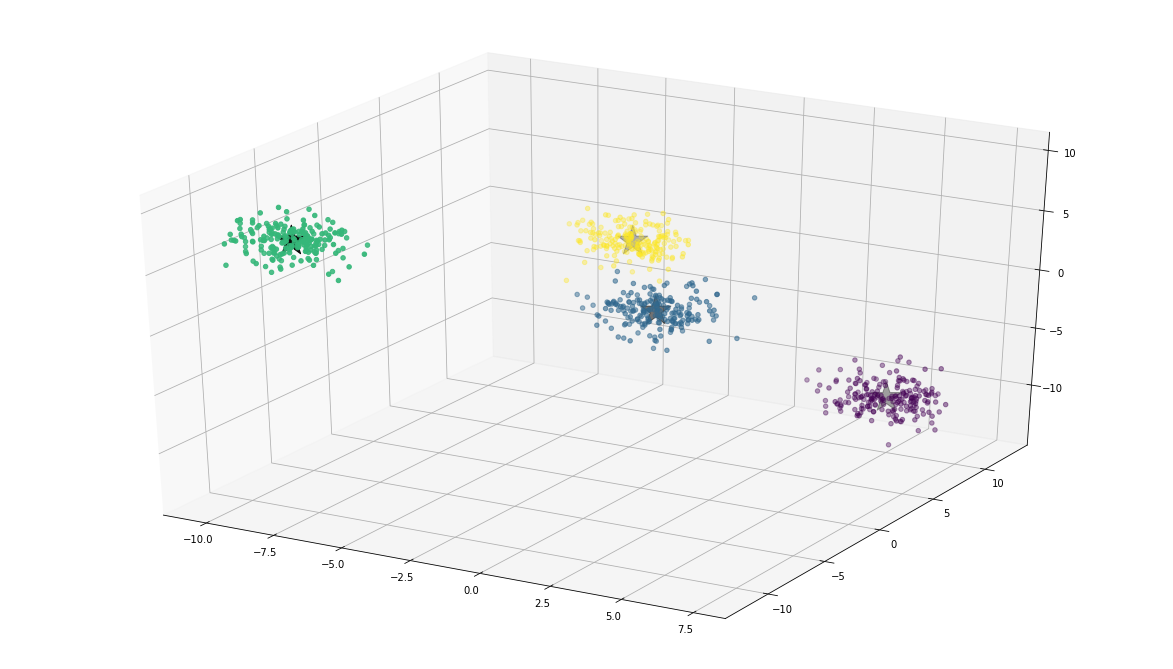

In [102]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)

In [ ]:
# although it is easy to understand following are the disadvantages 
# If you run K-means on uniform data, you will get clusters.
# Sensitive to scale due to its reliance on Euclidean distance.
# Even on perfect data sets, it can get stuck in a local minimum


#imp..We often know the value of K. In that case we use the value of K. Else we use the Elbow Method.
# We run the algorithm for different values of K(say K = 10 to 1) and plot the K values against SSE(Sum of Squared Errors). 
# And select the value of K for the elbow point. point after which ther's no point running the algo again